In [2]:
# Cheak gpu
!nvidia-smi

Sat Dec  2 22:34:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 529.04       Driver Version: 529.04       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8     4W /  75W |    700MiB /  8188MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime

In [4]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv("train/train/train.csv")
test = pd.read_csv("test/test/test.csv")

In [14]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV file with image file names and labels
csv_path = 'train/train/train.csv'  # Replace with your actual CSV file path
data = pd.read_csv(csv_path)

# Path to the folder containing the images
image_folder = 'train/train/images'  # Replace with your actual image folder path

# Function to load and preprocess images
def load_and_preprocess_images(file_paths, target_size=(224, 224)):
    images = []
    for file_path in file_paths:
        image = cv2.imread(os.path.join(image_folder, file_path))
        image = cv2.resize(image, target_size)
        image = image.astype('float32') / 255.0  # Normalize pixel values
        images.append(image)
    return np.array(images)

# Load and preprocess images
images = load_and_preprocess_images(data['filename'])

# Encode labels (assuming labels are in 1, 2, 3, 4, 5, 6 format)
labels = data['label'] - 1  # Subtract 1 to convert to 0-based indices

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Print shapes for verification
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)


KeyError: 'filename'

In [6]:
train_images

array([[[[0.05490196, 0.15686275, 0.22352941],
         [0.12156863, 0.22352941, 0.28627452],
         [0.07058824, 0.1882353 , 0.23529412],
         ...,
         [0.1254902 , 0.14117648, 0.1254902 ],
         [0.0627451 , 0.05490196, 0.05098039],
         [0.04313726, 0.04313726, 0.04313726]],

        [[0.08235294, 0.09803922, 0.11764706],
         [0.02352941, 0.03921569, 0.04705882],
         [0.02352941, 0.04705882, 0.04313726],
         ...,
         [0.00392157, 0.01568628, 0.01568628],
         [0.04705882, 0.05882353, 0.06666667],
         [0.03529412, 0.03529412, 0.03529412]],

        [[0.01176471, 0.0627451 , 0.08235294],
         [0.07058824, 0.12156863, 0.13333334],
         [0.03921569, 0.07843138, 0.08235294],
         ...,
         [0.16470589, 0.22745098, 0.2509804 ],
         [0.10196079, 0.13725491, 0.16078432],
         [0.01568628, 0.01568628, 0.01568628]],

        ...,

        [[0.17254902, 0.21568628, 0.23137255],
         [0.14509805, 0.1882353 , 0.20392157]

In [7]:
# Assuming train_images, train_labels, val_images, val_labels are already loaded and preprocessed

# Create a base model (EfficientNetV2B0)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# Pass inputs through the base model
x = base_model(inputs)

# Global Average Pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Output layer
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

# Combine inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Train the model
history_model_0 = model_0.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images, val_labels),
    # other parameters...
)


Epoch 1/5
180/180 [==============================] - 84s 432ms/step - loss: 1.5804 - accuracy: 0.3194 - val_loss: 1.5749 - val_accuracy: 0.3285
Epoch 2/5
180/180 [==============================] - 84s 465ms/step - loss: 1.5704 - accuracy: 0.3241 - val_loss: 1.5768 - val_accuracy: 0.2799
Epoch 3/5
180/180 [==============================] - 89s 493ms/step - loss: 1.5735 - accuracy: 0.3182 - val_loss: 1.5668 - val_accuracy: 0.3306
Epoch 4/5
180/180 [==============================] - 102s 566ms/step - loss: 1.5718 - accuracy: 0.3172 - val_loss: 1.5931 - val_accuracy: 0.3285
Epoch 5/5
180/180 [==============================] - 88s 487ms/step - loss: 1.5697 - accuracy: 0.3252 - val_loss: 1.5477 - val_accuracy: 0.3222


In [4]:
# # Assuming you have your original training data in 'train_data'
# train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)
# Build a CNN model(same as tiny VGG )

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="sigmoid")
])

model_1.compile(loss= "sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# checkpoint_path = "models/checkpoint.ckpt"

# # Create a MOdelCheckpoint callback that saves the model's weights only
# checkpoint_callbck = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                         save_weights_only=True,
#                                                         save_best_only=False,
#                                                         save_freq="epoch",
#                                                         verbose=1)

In [19]:
# Train the model
history_model_1 = model_1.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images, val_labels),)

Epoch 1/5
180/180 [==============================] - 66s 353ms/step - loss: 0.0471 - accuracy: 0.9859 - val_loss: 1.8887 - val_accuracy: 0.7743
Epoch 2/5
180/180 [==============================] - 74s 410ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 1.8639 - val_accuracy: 0.7778
Epoch 3/5
180/180 [==============================] - 63s 352ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 2.1695 - val_accuracy: 0.7875
Epoch 4/5
180/180 [==============================] - 63s 350ms/step - loss: 8.7030e-04 - accuracy: 1.0000 - val_loss: 2.2918 - val_accuracy: 0.7868
Epoch 5/5
180/180 [==============================] - 60s 336ms/step - loss: 4.6963e-04 - accuracy: 1.0000 - val_loss: 2.3769 - val_accuracy: 0.7889


In [6]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [7]:
# Set checkpoint path

checkpoint_path = "models/checkpoint.ckpt"

# Create a MOdelCheckpoint callback that saves the model's weights only
checkpoint_callbck = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=False,
                                                        save_freq="epoch",
                                                        verbose=1)

In [7]:
# Train the model
history_model_1 = model_1.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = "models",
                                             experiment_name="model_1"),
                                             checkpoint_callbck])


Saving TensorBoard log files to: models/model_1/20231202-021619
Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 1.4139 - accuracy: 0.3866
Epoch 1: saving model to models\checkpoint.ckpt
180/180 [==============================] - 63s 325ms/step - loss: 1.4139 - accuracy: 0.3866 - val_loss: 1.2279 - val_accuracy: 0.4944
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 0.9875 - accuracy: 0.6174
Epoch 2: saving model to models\checkpoint.ckpt
180/180 [==============================] - 59s 326ms/step - loss: 0.9875 - accuracy: 0.6174 - val_loss: 1.1120 - val_accuracy: 0.5903
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 0.5849 - accuracy: 0.7894
Epoch 3: saving model to models\checkpoint.ckpt
180/180 [==============================] - 61s 339ms/step - loss: 0.5849 - accuracy: 0.7894 - val_loss: 0.8950 - val_accuracy: 0.6924
Epoch 4/10
180/180 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9031
Epoch 

In [8]:

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


In [12]:
#plot loss curve
plot_loss_curves(history_model_0)

NameError: name 'history_model_0' is not defined

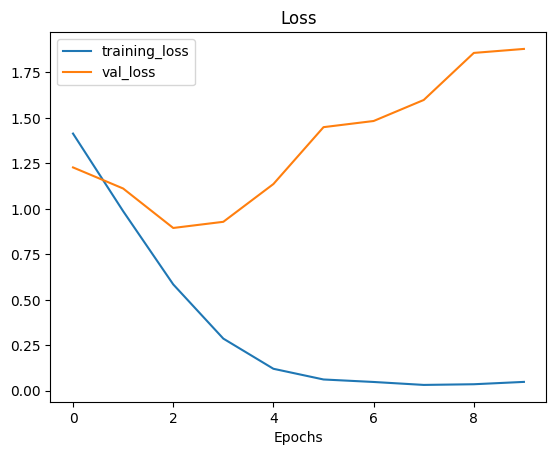

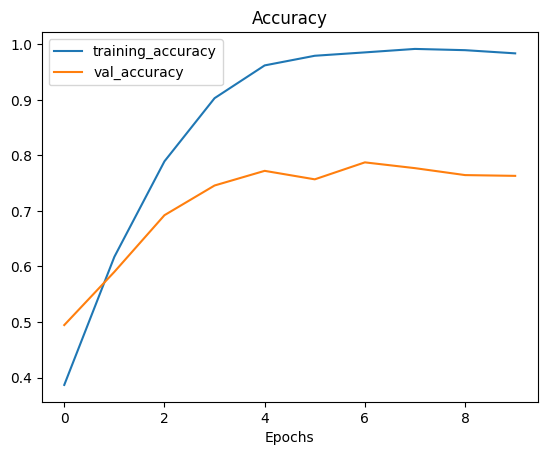

In [10]:
plot_loss_curves(history_model_1)

In [9]:
# CVreate model 2 with data augmentation built in

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Create a frozen base model (EfficientNetV2B0)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create the data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name="data_augmentation")

# Create the input and outputs (including the layers in between)
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)  # augment training images
x = base_model(x, training=False)  # pass augmented images to base model in inference mode
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(6, activation="softmax", name="output_layer")(x)  # Assuming 6 classes
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss="sparse_categorical_crossentropy",  # Use sparse categorical crossentropy for integer labels
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


In [10]:
# Train the model
history_model_2 = model_2.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = "models",
                                             experiment_name="model_2"),
                                             checkpoint_callbck])


Saving TensorBoard log files to: models/model_2/20231202-121349
Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 1.5827 - accuracy: 0.3196
Epoch 1: val_loss improved from inf to 1.56949, saving model to models\checkpoint.ckpt
180/180 [==============================] - 129s 678ms/step - loss: 1.5827 - accuracy: 0.3196 - val_loss: 1.5695 - val_accuracy: 0.2799
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 1.5767 - accuracy: 0.3245
Epoch 2: val_loss improved from 1.56949 to 1.55838, saving model to models\checkpoint.ckpt
180/180 [==============================] - 116s 643ms/step - loss: 1.5767 - accuracy: 0.3245 - val_loss: 1.5584 - val_accuracy: 0.3285
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 1.5803 - accuracy: 0.3158
Epoch 3: val_loss did not improve from 1.55838
180/180 [==============================] - 110s 609ms/step - loss: 1.5803 - accuracy: 0.3158 - val_loss: 1.5609 - val_accuracy: 0.3285
Epoch 4/10
180/180

In [13]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    
    
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [14]:
# Train the model
history_model_3 = model_3.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = "models",
                                             experiment_name="model_3"),
                                             checkpoint_callbck])


Saving TensorBoard log files to: models/model_3/20231202-212209
Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 6.7876 - accuracy: 0.4523
Epoch 1: saving model to models\checkpoint.ckpt
180/180 [==============================] - 118s 621ms/step - loss: 6.7876 - accuracy: 0.4523 - val_loss: 3.5027 - val_accuracy: 0.2861
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.8210
Epoch 2: saving model to models\checkpoint.ckpt
180/180 [==============================] - 102s 569ms/step - loss: 0.4953 - accuracy: 0.8210 - val_loss: 2.0322 - val_accuracy: 0.4340
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9514
Epoch 3: saving model to models\checkpoint.ckpt
180/180 [==============================] - 103s 572ms/step - loss: 0.1506 - accuracy: 0.9514 - val_loss: 1.1136 - val_accuracy: 0.6667
Epoch 4/10
180/180 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9882
Epo

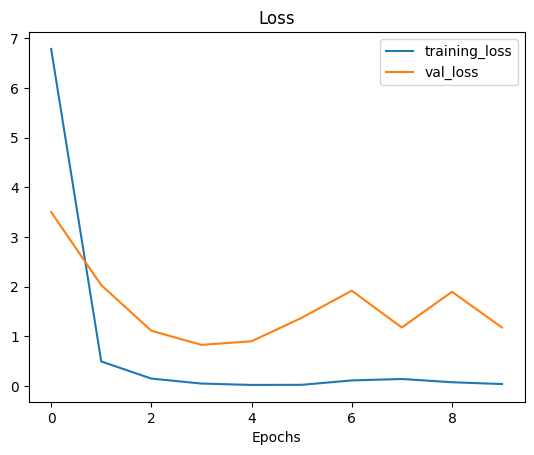

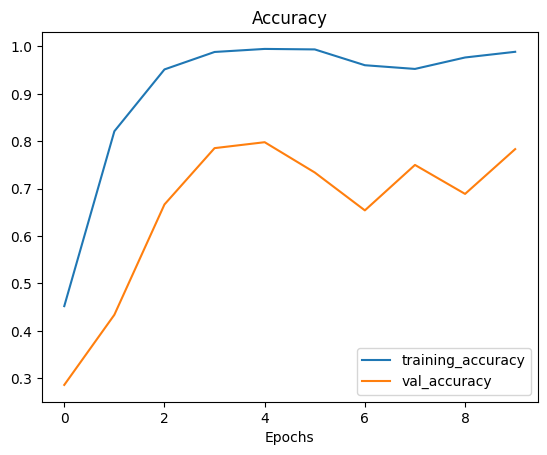

In [15]:
plot_loss_curves(history_model_3)

In [9]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
     
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="softmax")
])

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [10]:
# Train the model
history_model_4 = model_4.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = "models",
                                             experiment_name="model_4"),
                                             checkpoint_callbck])


Saving TensorBoard log files to: models/model_4/20231202-223535
Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 4.5380 - accuracy: 0.4012
Epoch 1: saving model to models\checkpoint.ckpt
180/180 [==============================] - 109s 590ms/step - loss: 4.5380 - accuracy: 0.4012 - val_loss: 1.5788 - val_accuracy: 0.3486
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 1.0286 - accuracy: 0.5955
Epoch 2: saving model to models\checkpoint.ckpt
180/180 [==============================] - 113s 631ms/step - loss: 1.0286 - accuracy: 0.5955 - val_loss: 1.3306 - val_accuracy: 0.4431
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 0.7448 - accuracy: 0.7118
Epoch 3: saving model to models\checkpoint.ckpt
180/180 [==============================] - 115s 639ms/step - loss: 0.7448 - accuracy: 0.7118 - val_loss: 1.0121 - val_accuracy: 0.6243
Epoch 4/10
180/180 [==============================] - ETA: 0s - loss: 0.5270 - accuracy: 0.7955
Epo

In [11]:
model_4.save("best_model_HDF5_format.keras")

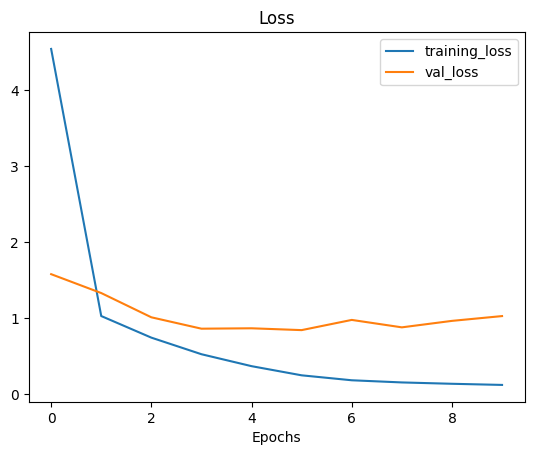

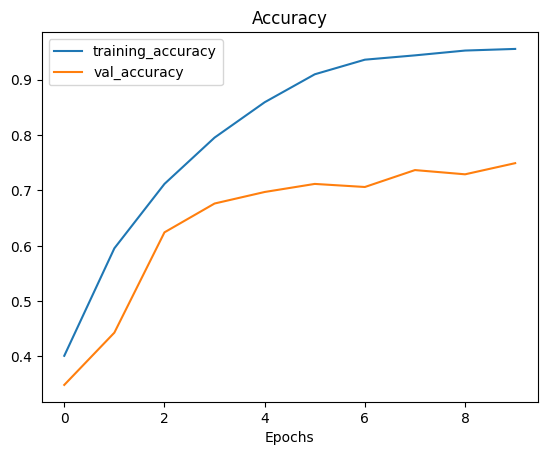

In [12]:
plot_loss_curves(history_model_4)

In [13]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load the test data CSV file
test_csv_path = 'test/test/test.csv'  # Replace with the actual path
test_data = pd.read_csv(test_csv_path)

# Path to the folder containing test images
test_image_folder = 'test/test/images'  # Replace with the actual path

# Function to load and preprocess test images
def load_and_preprocess_test_images(file_paths, target_size=(224, 224)):
    images = []
    for file_path in file_paths:
        image = cv2.imread(os.path.join(test_image_folder, file_path))
        image = cv2.resize(image, target_size)
        image = image.astype('float32') / 255.0  # Normalize pixel values
        images.append(image)
    return np.array(images)

# Load and preprocess test images
test_images = load_and_preprocess_test_images(test_data['filename'])



# Enable memory debugging
tf.debugging.experimental.enable_dump_debug_info("memory_debug")

# Make predictions
predictions = model_4.predict(test_images)

# Disable memory debugging
tf.debugging.experimental.disable_dump_debug_info()


# Assign labels based on the predicted probabilities
predicted_labels = np.argmax(predictions, axis=1)

# Add predicted labels to the test data DataFrame
test_data['predicted_label'] = predicted_labels + 1  # Add 1 to convert back to 1-indexed labels

# Save the updated test data CSV file
test_data.to_csv('Results/result.csv', index=False)  # Replace with the desired path


INFO:tensorflow:Enabled dumping callback in thread MainThread (dump root: memory_debug, tensor debug mode: NO_TENSOR)
150/150 [==============================] - 20s 128ms/step
INFO:tensorflow:Disabled dumping callback in thread MainThread (dump root: memory_debug)
